In [1]:
import cv2
import numpy as np
import glob
import os
from os import listdir
from os.path import isfile, join
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
folname = 'agubh2-10km-hr-0hfld-340-lateralacc' #bed evol frames
#mypath = f'/Volumes/SAF_Data/timelapse-files/framesexport/goldenframes/dated'# landsat frames
mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Plots/gifs/frames/{folname}'
#name = 'irrawaddy'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = sorted(onlyfiles[50:])
print(onlyfiles)

['f-150.png', 'f-151.png', 'f-152.png', 'f-153.png', 'f-154.png', 'f-155.png', 'f-156.png', 'f-157.png', 'f-158.png', 'f-159.png', 'f-160.png', 'f-161.png', 'f-162.png', 'f-163.png', 'f-164.png', 'f-165.png', 'f-166.png', 'f-167.png', 'f-168.png', 'f-169.png', 'f-170.png', 'f-171.png', 'f-172.png', 'f-173.png', 'f-174.png', 'f-175.png', 'f-176.png', 'f-177.png', 'f-178.png', 'f-179.png', 'f-180.png', 'f-181.png', 'f-182.png', 'f-183.png', 'f-184.png', 'f-185.png', 'f-186.png', 'f-187.png', 'f-188.png', 'f-189.png', 'f-190.png', 'f-191.png', 'f-192.png', 'f-193.png', 'f-194.png', 'f-195.png', 'f-196.png', 'f-197.png', 'f-198.png', 'f-199.png', 'f-200.png', 'f-201.png', 'f-202.png', 'f-203.png', 'f-204.png', 'f-205.png', 'f-206.png', 'f-207.png', 'f-208.png', 'f-209.png', 'f-210.png', 'f-211.png', 'f-212.png', 'f-213.png', 'f-214.png', 'f-215.png', 'f-216.png', 'f-217.png', 'f-218.png', 'f-219.png', 'f-220.png', 'f-221.png', 'f-222.png', 'f-223.png', 'f-224.png', 'f-225.png', 'f-226.png'

## From frames, no pre-processing

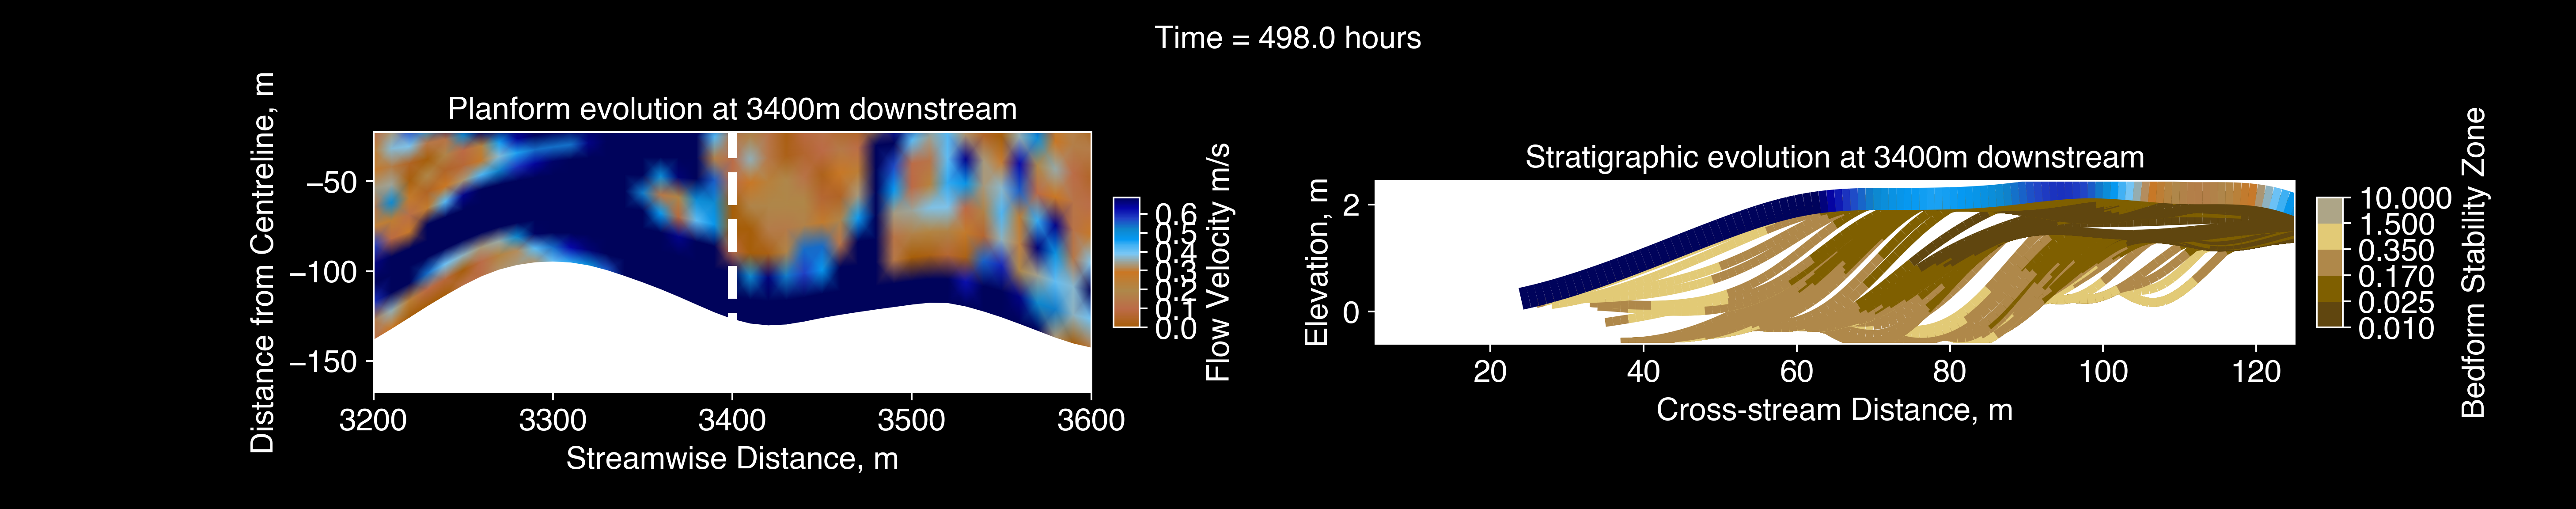

In [4]:
num_timesteps = len(onlyfiles)
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(1, figsize = (16, 3), dpi = 360)  ## for bed evol
    #fig, ax = plt.subplots(1, figsize = (19.20, 10.80), dpi = 300)  ## for landsat

    def animate(i):
        img = plt.imread(f'{mypath}/{onlyfiles[i]}')

    #with plt.style.context('dark_background'):
        ax.clear()
        image = plt.imshow(img)
        ax.axis('off')
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)

        
interval = 0.002 #in seconds     
ani = animation.FuncAnimation(fig = fig, func = animate, frames = int(num_timesteps), interval=interval*1e+3, blit=False)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=1800)

filesave = f'/Volumes/SAF_Data/NAYS2DH_files/Plots/videos/{folname}.mp4' ## bed evol
#filesave = f'/Volumes/SAF_Data/timelapse-files/complete-gifs/{name}.mp4' ## landsat

ani.save(filesave, writer = writer)

## Crop the frames

Image shape is:  (2815, 5000, 3)


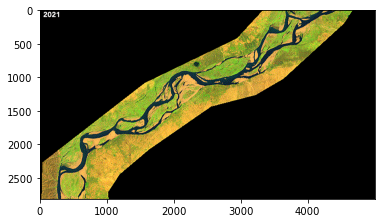

In [39]:
# read one image, confirm cropping area
testimg = plt.imread(f'{mypath}/{onlyfiles[-1]}')
plt.imshow(testimg)
print('Image shape is: ', testimg.shape)

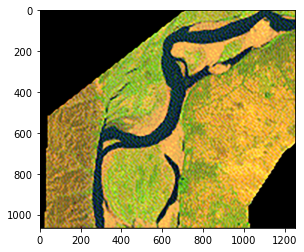

In [41]:
# decide where you wanna crop from the axes above. 
#xlim = [1000:2000]
#ylim = [1000:2500]
testcrop = testimg[1750:, :1250, :]
plt.imshow(testcrop)

Now make the animation, make sure to check figure size

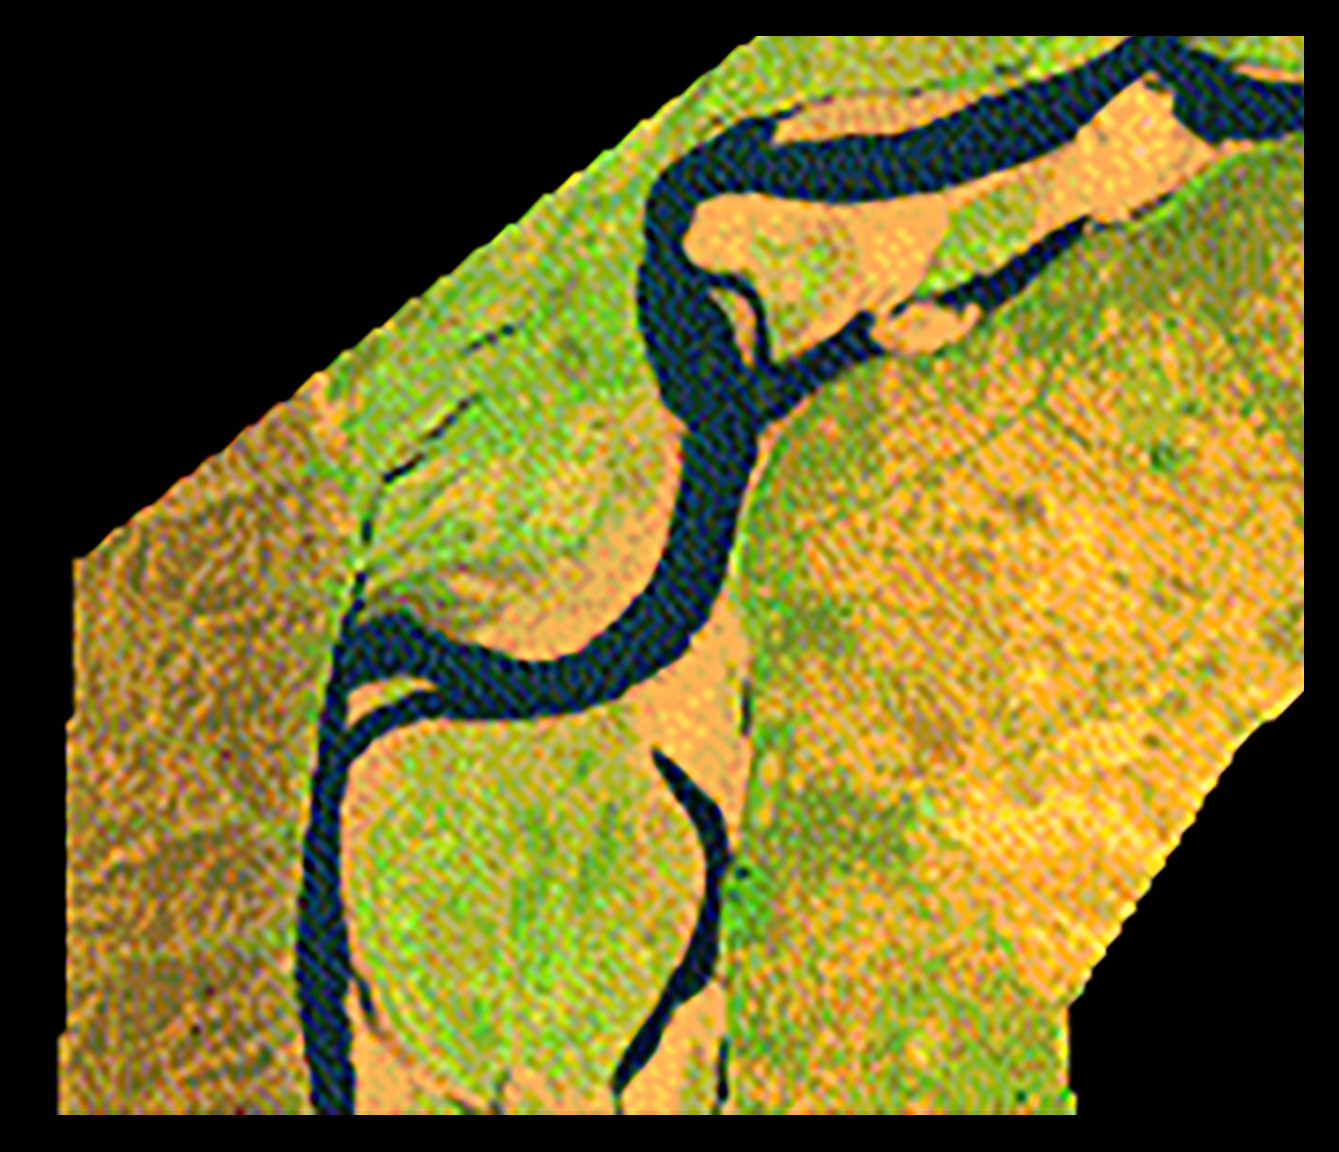

In [44]:
num_timesteps = len(onlyfiles)
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(1, figsize = (5.33, 3), dpi = 360)
    def animate(i):
        img = plt.imread(f'{mypath}/{onlyfiles[i]}')
        cimg = img[1750:, :1250, :]
        ax.clear()
        image = ax.imshow(cimg)
        ax.axis('off')
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0);  plt.margins(0, 0)

        
interval = 0.002 #in seconds     
ani = animation.FuncAnimation(fig = fig, func = animate, frames = int(num_timesteps), interval=interval*1e+3, blit=False)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=1800)
filesave = f'/Volumes/SAF_Data/timelapse-files/complete-gifs/{name}.mp4'
ani.save(filesave, writer = writer)



In [2]:
savefilesto = (f'/Volumes/SAF_Data/NAYS2DH_files/Plots/videos/k-vid-full-{idf}-{nickname}')
filesave = str(savefilesto)+'.mp4'
ani.save(filesave, writer = writer)

img = plt.imread()

fig, ax = plt.subplots(figsize = (19.20, 10.80), tight_layout = True, dpi = 300)
data = ax.pcolormesh(xdomain, ydomain, elev_postf, cmap = get_continuous_cmap(test), norm = midnorm, shading = 'gouraud')#, norm = midnorm, shading = 'gouraud')
ax.set_aspect('equal')
uprbd = 0
lwrbd = 10000
def animate(i):
    img = plt.imread
    xdomain = np.reshape(datamaster[:, 2, i], (gridy, gridx))
    ydomain = np.reshape(datamaster[ :, 3, i] , (gridy, gridx))
    elev = np.reshape(datamaster[:, char, i], (gridy, gridx))
    ax.clear()
    #data = ax.contourf(xdomain, ydomain, elev, levels = 500, cmap = 'gist_earth', norm=normalise)
    data = ax.pcolormesh(xdomain, ydomain, elev, cmap = get_continuous_cmap(test), norm = midnorm, shading = 'gouraud')
    ax.set_ylim(llim, ulim)
    ax.set_xlim(uprbd, lwrbd)
    ax.set_title(f'Time = {(i*interval_to_plot)} hr') 
    ax.set_xlabel('Streamwise Distance, m')
    ax.set_aspect('equal')
    ax.set_ylabel('Distance from centreline, m')
    ax.set_facecolor('w')
fig.colorbar(data, ax=ax, label = 'Flow velocity, m/s', shrink = 0.25, pad=0.02, aspect = 25)


#plt.show()